# MNIST Handwritten Digit Classification using Deep learning(Neural Network)

# Importing the libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

ModuleNotFoundError: No module named 'google.colab'

# Loading the MNIST data from keras datasets

In [ ]:
(X_train,Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

# shape of the numpy arrays

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# Training data = 60,000 images
# Test data = 10,000 images

# Image dimension = 28 x 28
# Grayscale image = 1 channel

In [ ]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


# Displaying the image

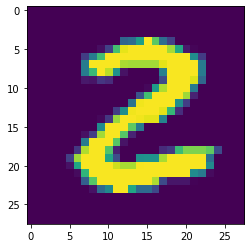

2


In [ ]:
# displaying the imsge
plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

# Image labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# We can use the labels as such or we can also apply One Hot Encoding

# All the images have the same dimensions in the dataset, if not, we have to resize all the images to a common dimension

In [ ]:
# scaling the values
X_train = X_train/255
X_test = X_test/255


In [ ]:
# printing the 10th image 
print(X_train[10])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

# Building the Neural Network

In [ ]:
# setting up the layers of neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')

])

# Compiling the Neural Network

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =  ['accuracy'])

# Training the Neural Network

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2251 - accuracy: 0.9340
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2139 - accuracy: 0.9381
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2041 - accuracy: 0.9398
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1946 - accuracy: 0.9433
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1857 - accuracy: 0.9458
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1773 - accuracy: 0.9477
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1706 - accuracy: 0.9503
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1625 - accuracy: 0.9524
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1560 - accuracy: 0.9545
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.150

Training data accuracy  = 95.9%


# Accuracy on Test Data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1581 - accuracy: 0.9542
0.954200029373169


Test Data accuracy = 95.4%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


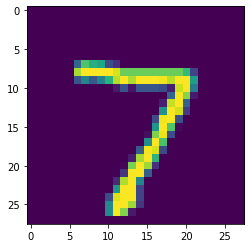

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[5.1052779e-02 1.2764335e-04 1.4450234e-01 8.9939517e-01 4.9078465e-04
 4.7966689e-02 6.8035297e-09 9.9986041e-01 8.8183105e-02 2.1895078e-01]


model predict() gives the prediction of each class for that data point

In [ ]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.array(Y_pred[0])
print(label_for_first_test_image)

[5.1052779e-02 1.2764335e-04 1.4450234e-01 8.9939517e-01 4.9078465e-04
 4.7966689e-02 6.8035297e-09 9.9986041e-01 8.8183105e-02 2.1895078e-01]


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test = True labels
Y_pred_labels = predicted labels

# Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 963    0    1    1    0    3    7    1    2    2]
 [   0 1119    3    2    0    1    3    2    5    0]
 [   7    5  975    5    5    2    9   11   10    3]
 [   1    3   14  939    0   24    0   11   16    2]
 [   0    1    4    0  938    0   10    4    3   22]
 [   6    2    1    7    4  840   11    2   12    7]
 [   8    3    1    0    3   11  928    0    4    0]
 [   1   14   11    5    0    2    0  983    0   12]
 [   3    6    0    8    6   16    8    9  911    7]
 [   2    8    0    7   19   10    1    8    8  946]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

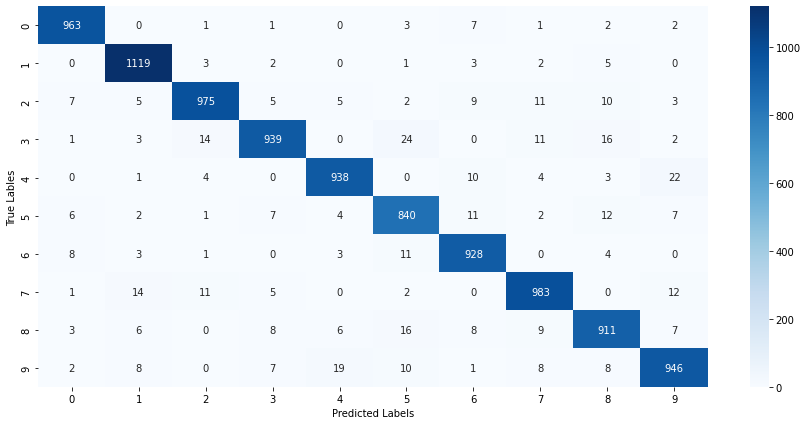

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Lables')
plt.xlabel('Predicted Labels')

# Building a Predictive System

In [ ]:
input_image_path = '/MNIST_digit.png'

In [ ]:
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

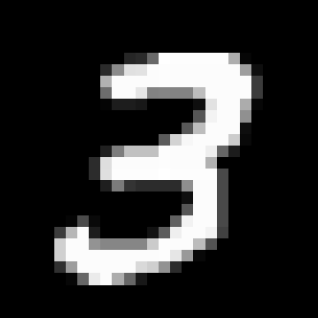

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

[[0.        0.        0.9999995 1.        0.        0.        0.
  0.        1.        0.       ]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


# Predictive System

Path of the image to be predicted:/MNIST_digit.png


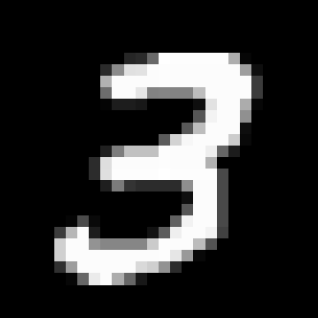

The Handwritten Digit is recognized as 3


In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognized as', input_pred_label)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New section